In [1]:
import pandas as pd
import networkx as nx
import graph_tool.all as gt

import scipy.stats as stats

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from os.path import join

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# Preferntial attachment

Preferential attachment is the mechanism of the formation of a network where some nodes have preference of attachment over other nodes, usually depending on their previous degree.

Distribution of degrees of the top layer follow a power law.

In [3]:
DATA = "/Users/rdora/breast_cancer/data/"
FIG = "/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/"

In [4]:
netparams = pd.read_csv(join(DATA, "netparams_tidy.csv"))

In [5]:
class Power_law():
    def __init__(self, a):
        self.a = a
    def p(self, x):
        return x ** (- self.a)

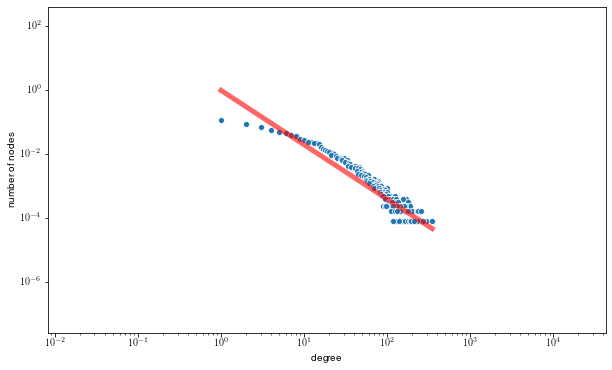

In [6]:
# The case of the top layer healthy network
G_top = pd.read_csv("/Users/rdora/breast_cancer/healthy/gene-range_100.csv")
G_top = nx.from_pandas_edgelist(G_top,
                               source="gene_1",
                               target="gene_2")

degree_top = pd.DataFrame(G_top.degree,
                         columns=['node', 'degree'])

# Degree distribution healthy network
fig, ax = plt.subplots(figsize=(10, 6))
ax.set(xscale="log", yscale="log")
deg_freq = degree_top.degree.value_counts(normalize=True).reset_index()
deg_freq = deg_freq.rename(columns={"index": "degree", "degree": "number of nodes"})
sns.scatterplot(x="degree", y='number of nodes', ax=ax, data=deg_freq)

# Plot a power law
a = 1.7
power_law = Power_law(a)
x = np.linspace(deg_freq.degree.min(), deg_freq.degree.max(), 100)
ax.plot(x, power_law.p(x), 'r-', lw=5, alpha=0.6)

fig.savefig(join(FIG, "pa_dist.png"), dpi=300)

# Make tidy dataframe with different frequencies

For each degree and each layer we look at its frequency across different layers.

In [7]:
A = 0
data = []
for i in range(A, 101):
    # Healthy
    path = f"/Users/rdora/breast_cancer/healthy/gene-range_{i}.csv"
    df = pd.read_csv(path)
    G = nx.from_pandas_edgelist(df,
                                   source="gene_1",
                                   target="gene_2")

    degree = pd.DataFrame(G.degree,
                             columns=['node', 'degree'])
    deg_freq = degree.degree.value_counts(normalize=True).reset_index()
    deg_freq = deg_freq.rename(columns={"index": "degree", "degree": "frequency"})
    deg_freq['layer'] = i
    deg_freq['tissue'] = 'healthy'
    data.append(deg_freq)
    
    # Cancer
    path = f"/Users/rdora/breast_cancer/basal/gene-range_{i}.csv"
    df = pd.read_csv(path)
    G = nx.from_pandas_edgelist(df,
                                   source="gene_1",
                                   target="gene_2")

    degree = pd.DataFrame(G.degree,
                             columns=['node', 'degree'])
    deg_freq = degree.degree.value_counts(normalize=True).reset_index()
    deg_freq = deg_freq.rename(columns={"index": "degree", "degree": "frequency"})
    deg_freq['layer'] = i
    deg_freq['tissue'] = 'basal'
    data.append(deg_freq)
    
df = pd.concat(data)

In [8]:
df[(df.layer==0) & (df.tissue=='healthy')]['degree'].mean()

16.5

# 2D plot of some layers' degree distributions

Plot to be saved to use in a figure

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


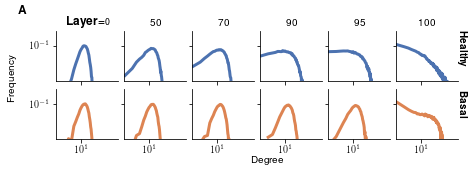

In [9]:
six = [0, 50, 70, 90, 95, 100]
df_6 = df[df['layer'].isin(six)]
df_6 = df_6.sort_values(by='degree')
with sns.color_palette('deep'):
    g = sns.FacetGrid(df_6, row='tissue', col='layer', hue='tissue', sharey=True,
                 sharex=True, height=1, aspect=1.2, row_order=['healthy', 'basal'],
                     hue_order=['healthy', 'basal'], gridspec_kws={"hspace":0.15, "wspace":0.1})
    g.map(plt.plot, "degree", "frequency", markersize=0, linewidth=3)
    
g.set(yscale="log", xscale='log', xlim=[df.degree.min() - .05, df.degree.max()],
     ylim=[0.0005, 1])

# Set titles
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '', template='{col_name}')

# Remove y labels
g.axes[0,0].set_ylabel('')
g.axes[1,0].set_ylabel('')

g.axes[0,0].set_title(r'\textbf{Layer}={\small 0}')
for i in range(6):
    g.axes[1,i].set_title('')
    g.axes[1,i].set_xlabel('')

    
# Text
g.fig.text(0.9, 0.65, r'\textbf{Healthy}', rotation=270)
g.fig.text(0.9, 0.3, r'\textbf{Basal}', rotation=270)

# Labels
g.fig.text(0.5, -0.03, r'Degree')
g.fig.text(0.03, 0.4, r'Frequency', rotation=90)

g.fig.text(0.05, 1, r'\large \textbf{A}')

g.savefig(join(FIG, "degree_evolution.png"), dpi=300)

In [10]:
o_six = [95, 96, 97, 98, 99, 100]
df_o6 = df[df['layer'].isin(o_six)]
df_o6 = df_o6.sort_values(by='degree')

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


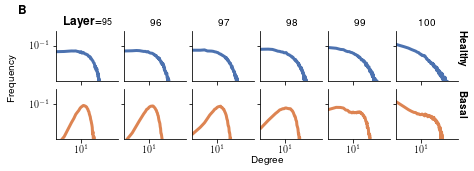

In [11]:
with sns.color_palette('deep'):
    g = sns.FacetGrid(df_o6, row='tissue', col='layer', hue='tissue', sharey=True,
                 sharex=True, height=1, aspect=1.2, row_order=['healthy', 'basal'],
                     hue_order=['healthy', 'basal'], gridspec_kws={"hspace":0.15, "wspace":0.1})
    g.map(plt.plot, "degree", "frequency", markersize=0, linewidth=3)
    
g.set(yscale="log", xscale='log', xlim=[df.degree.min() - .05, df.degree.max()],
     ylim=[0.0005, 1])

# Set titles
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '', template='{col_name}')

# Remove y labels
g.axes[0,0].set_ylabel('')
g.axes[1,0].set_ylabel('')

g.axes[0,0].set_title(r'\textbf{Layer}={\small 95}')
for i in range(6):
    g.axes[1,i].set_title('')
    g.axes[1,i].set_xlabel('')

    
# Text
g.fig.text(0.9, 0.65, r'\textbf{Healthy}', rotation=270)
g.fig.text(0.9, 0.3, r'\textbf{Basal}', rotation=270)

# Labels
g.fig.text(0.5, -0.03, r'Degree')
g.fig.text(0.03, 0.4, r'Frequency', rotation=90)

g.fig.text(0.05, 1, r'\large \textbf{B}')

g.savefig(join(FIG, "degree_evolution_last_6.png"), dpi=300)

In [12]:
df_1 = df_o6[(df_o6.layer==100) | (df_o6.layer==95)]

In [13]:
df_1.head()

,degree,frequency,layer,tissue
35,1,0.000207,95,basal
0,1,0.121967,100,healthy
0,1,0.132887,100,basal
8,1,0.042426,95,healthy
1,2,0.065992,100,basal


In [20]:
df_6.degree.value_counts()

26     12
15     12
30     12
29     12
28     12
       ..
136     1
134     1
133     1
132     1
101     1
Name: degree, Length: 202, dtype: int64

In [32]:
path = f"/Users/rdora/breast_cancer/healthy/gene-range_100.csv"
df = pd.read_csv(path)
G_100 = nx.from_pandas_edgelist(df,
                               source="gene_1",
                               target="gene_2")
path = f"/Users/rdora/breast_cancer/healthy/gene-range_95.csv"
df = pd.read_csv(path)
G_95 = nx.from_pandas_edgelist(df,
                               source="gene_1",
                               target="gene_2")

In [47]:
path = f"/Users/rdora/breast_cancer/basal/gene-range_100.csv"
df = pd.read_csv(path)
G_100 = nx.from_pandas_edgelist(df,
                               source="gene_1",
                               target="gene_2")
path = f"/Users/rdora/breast_cancer/basal/gene-range_95.csv"
df = pd.read_csv(path)
G_95 = nx.from_pandas_edgelist(df,
                               source="gene_1",
                               target="gene_2")

In [33]:
deg_100 = pd.DataFrame(G_100.degree, columns=['node', 'degree'])
deg_95 = pd.DataFrame(G_95.degree, columns=['node', 'degree'])

In [48]:
deg_100_b = pd.DataFrame(G_100.degree, columns=['node', 'degree'])
deg_95_b = pd.DataFrame(G_95.degree, columns=['node', 'degree'])

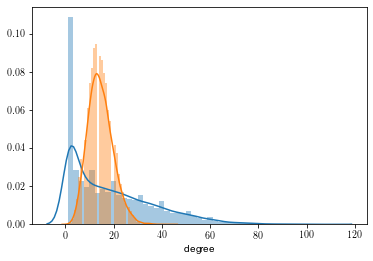

In [68]:
fig, ax = plt.subplots()
g1 = sns.distplot(deg_100_b.degree, ax=ax)
g2 = sns.distplot(deg_95_b.degree, ax=ax)

In [70]:
deg_100['tissue'] = 'Healthy'
deg_100['layer'] = 100
deg_95['tissue'] = 'Healthy'
deg_95['layer'] = 95
deg_100_b['tissue'] = 'Basal'
deg_100_b['layer'] = 100
deg_95_b['tissue'] = 'Basal'
deg_95_b['layer'] = 95

In [71]:
deg = pd.concat([deg_100, deg_95, deg_100_b, deg_95_b])

In [84]:
plt.hist?

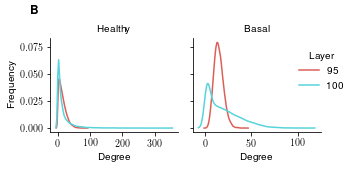

In [87]:
with sns.color_palette("hls", 2):
    g = sns.FacetGrid(deg, col='tissue', hue='layer', sharey=True,
                 sharex='col', height=2.2, aspect=1, row_order=['Basal', 'Healthy'],
                     hue_order=[95, 100])
    g.map(sns.distplot, "degree", kde=True, hist=False, bins=20)
    
g.set(yscale="linear", xscale='linear')

# Set titles
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '', template='{col_name}')

# Remove y labels
g.axes[0,0].set_ylabel('Frequency')

g.axes[0,0].set_xlabel('Degree')
g.axes[0,1].set_xlabel('Degree')

plt.legend(frameon=False, title="Layer",
          loc=(0.8, 0.4))

g.fig.text(0.05, 1, r'\large \textbf{B}')

g.savefig(join(FIG, "degree_distribution.png"), dpi=300)

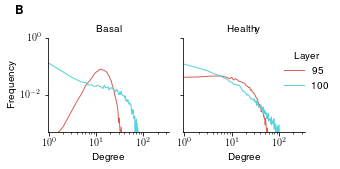

In [62]:
df_1 = df_1.replace({'healthy': 'Healthy', 'basal': 'Basal'})
with sns.color_palette("hls", 2):
    g = sns.FacetGrid(df_1, col='tissue', hue='layer', sharey=True,
                 sharex=True, height=2.2, aspect=1, row_order=['healthy', 'basal'],
                     hue_order=[95, 100])
    g.map(plt.plot, "degree", "frequency", markersize=0, linewidth=1)
    
g.set(yscale="log", xscale='log', xlim=[deg_100.degree.min() - .05, deg_100.degree.max()],
     ylim=[0.0005, 1])

# Set titles
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '', template='{col_name}')

# Remove y labels
g.axes[0,0].set_ylabel('Frequency')

g.axes[0,0].set_xlabel('Degree')
g.axes[0,1].set_xlabel('Degree')

plt.legend(frameon=False, title="Layer",
          loc=(0.8, 0.4))

g.fig.text(0.05, 1, r'\large \textbf{B}')

g.savefig(join(FIG, "degree_distribution.png"), dpi=300)

# Degree Evolution for a set of nodes

Let's take a second to evaluate the evolution of degrees across different groups of nodes.

One group of highly connected nodes and another random group.

Two groups of nodes:

- G1: nodes of the top layer main core
- G2: Group at random with cardinality |G1|

An alternative group of nodes:

- G1: Hubs, nodes with a degree larger than $\mu + 2\sigma$.
- G2: Random group with cardinality |G1|

In [32]:
# degree for each node on each layer
dataframes = []
for tissue in ['healthy', 'basal']:
    for i in range(101):
        path = f"/Users/rdora/breast_cancer/{tissue}/gene-range_{i}.csv"
        temp = pd.read_csv(path)
        G = nx.from_pandas_edgelist(temp,
                                   source="gene_1",
                                   target="gene_2")
        degree = pd.DataFrame(G.degree, columns=['node', 'degree'])
        degree['layer'] = i
        degree['tissue'] = tissue
        dataframes.append(degree)
df_d = pd.concat(dataframes)
del dataframes

In [33]:
# List of all nodes
G_low = pd.read_csv("/Users/rdora/breast_cancer/healthy/gene-range_0.csv")
G_low = nx.from_pandas_edgelist(G_low,
                               source="gene_1",
                               target="gene_2")
nodes = list(G_low.nodes)
print(f"{len(nodes)} total nodes")

14474 total nodes


## First group: Hubs

We'll show the evolution for some layers only

In [34]:
G_top = pd.read_csv("/Users/rdora/breast_cancer/healthy/gene-range_100.csv")
G_top = nx.from_pandas_edgelist(G_top,
                               source="gene_1",
                               target="gene_2")
degs = [d for v, d in G_top.degree]
mu, sigma = np.mean(degs), np.std(degs)
# Hubs
G1_h = [v for v, d in G_top.degree if d >= mu + 2 * sigma]

In [35]:
mu + 2 * sigma

69.59046623752214

In [36]:
len(G1_h)

533

In [37]:
G_top = pd.read_csv("/Users/rdora/breast_cancer/basal/gene-range_100.csv")
G_top = nx.from_pandas_edgelist(G_top,
                               source="gene_1",
                               target="gene_2")
degs = [d for v, d in G_top.degree]
mu, sigma = np.mean(degs), np.std(degs)
# Hubs
G1_b = [v for v, d in G_top.degree if d >= mu + 2 * sigma]

In [38]:
mu + 2 * sigma

53.80126980380292

In [39]:
len(G1_b)

534

In [40]:
data = []
ten = [0, 50, 70, 90, 95, 96, 97, 98, 99, 100]
G1s = [G1_h, G1_b]
df_ten = df_d[df_d['layer'].isin(ten)]
for x, tissue in enumerate(['healthy', 'basal']):
    df_G1 = df_ten[(df_ten['node'].isin(G1s[x])) & (df_ten['tissue']==tissue)]
    df_G1['group'] = 'A'
    data.append(df_G1)
    for i in range(101):
        G2 = np.random.choice(nodes, len(G1s[x]))
        df_G2 = df_ten[(df_ten['node'].isin(G2)) & (df_ten['tissue']==tissue)]
        df_G2['group'] = 'B'
        data.append(df_G2)
df_pa = pd.concat(data)
del data

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [41]:
len(G1_h)

533

In [42]:
six = [0, 50, 70, 90, 95, 100]
df_6 = df_pa[df_pa.layer.isin(six)]

In [48]:
df_6_h = df_6[df_6.tissue=='healthy']

In [55]:
df_6.to_csv("/Users/rdora/breast_cancer/data/degree_hubs_group.csv", index=False)

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


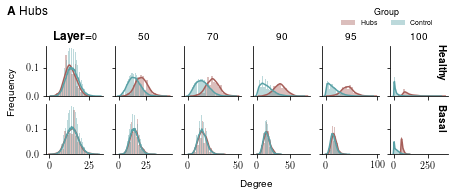

In [17]:
with sns.hls_palette(2, l=.5, s=.3):
    g = sns.FacetGrid(row='tissue', col='layer',
                     hue='group', data=df_6,
                     sharex='col', sharey='row',
                     height=1, aspect=1.2,
                     gridspec_kws={"hspace":0.15})

g.map(sns.distplot, "degree")

# Titles
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '', template = '{col_name}')

# Remove y labels
g.axes[0,0].set_ylabel('')
g.axes[1,0].set_ylabel('')

g.axes[0,0].set_title(r'\textbf{Layer}={\small 0}')
for i in range(6):
    g.axes[1,i].set_title('')
    g.axes[1,i].set_xlabel('')
    
# Text
g.fig.text(0.88, 0.65, r'\textbf{Healthy}', rotation=270)
g.fig.text(0.88, 0.3, r'\textbf{Basal}', rotation=270)

# Labels
g.fig.text(0.5, -0.1, r'Degree')
g.fig.text(0.05, 0.4, r'Frequency', rotation=90)

g.fig.text(0.05, 1.1, r'\large \textbf{A} Hubs')

# Legend
g.fig.legend(title=r'\small Group', labels=['Hubs', 'Control'], ncol=2, loc=(0.73, 0.85),
            fontsize='x-small', frameon=False);

g.savefig(join(FIG, "hubs_evolution.png"), dpi=300)

## Top 6 Layers

In [28]:
top = [95, 96, 97, 98, 99, 100]
df_top = df_pa[df_pa.layer.isin(top)]

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


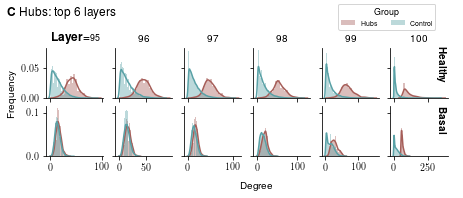

In [29]:
with sns.hls_palette(2, l=.5, s=.3):
    g = sns.FacetGrid(row='tissue', col='layer',
                     hue='group', data=df_top,
                     sharex='col', sharey='row',
                     height=1, aspect=1.2,
                     gridspec_kws={"hspace":0.15})

g.map(sns.distplot, "degree")

# Titles
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '', template = '{col_name}')

# Remove y labels
g.axes[0,0].set_ylabel('')
g.axes[1,0].set_ylabel('')

g.axes[0,0].set_title(r'\textbf{Layer}={\small 95}')
for i in range(6):
    g.axes[1,i].set_title('')
    g.axes[1,i].set_xlabel('')
    
# Text
g.fig.text(0.88, 0.65, r'\textbf{Healthy}', rotation=270)
g.fig.text(0.88, 0.3, r'\textbf{Basal}', rotation=270)

# Labels
g.fig.text(0.5, -0.1, r'Degree')
g.fig.text(0.05, 0.4, r'Frequency', rotation=90)

g.fig.text(0.05, 1.1, r'\large \textbf{C} Hubs: top 6 layers')

# Legend
g.fig.legend(title=r'\small Group', labels=['Hubs', 'Control'], ncol=2, loc=(0.73, 0.85),
            fontsize='x-small');

g.savefig(join(FIG, "top_hubs_evolution.png"), dpi=300)

## Second group: Main core

In [56]:
G_top = pd.read_csv("/Users/rdora/breast_cancer/healthy/gene-range_100.csv")
G_top = nx.from_pandas_edgelist(G_top,
                               source="gene_1",
                               target="gene_2")
degs = [d for v, d in G_top.degree]
mu, sigma = np.mean(degs), np.std(degs)
# main core
H = nx.k_core(G_top)

G1_h = list(H.nodes)

In [57]:
G_top = pd.read_csv("/Users/rdora/breast_cancer/basal/gene-range_100.csv")
G_top = nx.from_pandas_edgelist(G_top,
                               source="gene_1",
                               target="gene_2")
degs = [d for v, d in G_top.degree]
mu, sigma = np.mean(degs), np.std(degs)
# main core
F = nx.k_core(G_top, k=37)

G1_b = list(F.nodes)

In [70]:
len(G1_b)

113

In [58]:
data = []
ten = [0, 50, 70, 90, 95, 96, 97, 98, 99, 100]
G1s = [G1_h, G1_b]
df_ten = df_d[df_d['layer'].isin(ten)]
for x, tissue in enumerate(['healthy', 'basal']):
    df_G1 = df_ten[(df_ten['node'].isin(G1s[x])) & (df_ten['tissue']==tissue)]
    df_G1['group'] = 'A'
    data.append(df_G1)
    for i in range(101):
        G2 = np.random.choice(nodes, len(G1s[x]))
        df_G2 = df_ten[(df_ten['node'].isin(G2)) & (df_ten['tissue']==tissue)]
        df_G2['group'] = 'B'
        data.append(df_G2)
df_co = pd.concat(data)
del data

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [59]:
six = [0, 50, 70, 90, 95, 100]
df_6_co = df_co[df_co.layer.isin(six)]

In [64]:
df_6_co.to_csv("/Users/rdora/breast_cancer/data/degree_cores_group.csv", index=False)

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


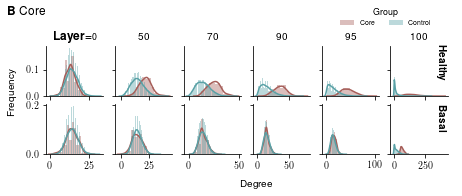

In [26]:
with sns.hls_palette(2, l=.5, s=.3):
    g = sns.FacetGrid(row='tissue', col='layer',
                     hue='group', data=df_6_co,
                     sharex='col', sharey='row',
                     height=1, aspect=1.2,
                     gridspec_kws={"hspace":0.15})

g.map(sns.distplot, "degree")

# Titles
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '', template = '{col_name}')

# Remove y labels
g.axes[0,0].set_ylabel('')
g.axes[1,0].set_ylabel('')

g.axes[0,0].set_title(r'\textbf{Layer}={\small 0}')
for i in range(6):
    g.axes[1,i].set_title('')
    g.axes[1,i].set_xlabel('')
    
# Text
g.fig.text(0.88, 0.65, r'\textbf{Healthy}', rotation=270)
g.fig.text(0.88, 0.3, r'\textbf{Basal}', rotation=270)

# Labels
g.fig.text(0.5, -0.1, r'Degree')
g.fig.text(0.05, 0.4, r'Frequency', rotation=90)

g.fig.text(0.05, 1.1, r'\large \textbf{B} Core')

# Legend
g.fig.legend(title=r'\small Group', labels=['Core', 'Control'], ncol=2, loc=(0.73, 0.85),
            fontsize='x-small', frameon=False);

g.savefig(join(FIG, "cores_evolution.png"), dpi=300)

## Top 6 Layers

In [30]:
top = [95, 96, 97, 98, 99, 100]
df_top = df_co[df_co.layer.isin(top)]

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


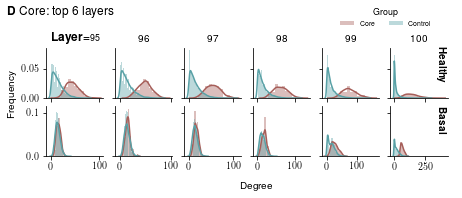

In [32]:
with sns.hls_palette(2, l=.5, s=.3):
    g = sns.FacetGrid(row='tissue', col='layer',
                     hue='group', data=df_top,
                     sharex='col', sharey='row',
                     height=1, aspect=1.2,
                     gridspec_kws={"hspace":0.15})

g.map(sns.distplot, "degree")

# Titles
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '', template = '{col_name}')

# Remove y labels
g.axes[0,0].set_ylabel('')
g.axes[1,0].set_ylabel('')

g.axes[0,0].set_title(r'\textbf{Layer}={\small 95}')
for i in range(6):
    g.axes[1,i].set_title('')
    g.axes[1,i].set_xlabel('')
    
# Text
g.fig.text(0.88, 0.65, r'\textbf{Healthy}', rotation=270)
g.fig.text(0.88, 0.3, r'\textbf{Basal}', rotation=270)

# Labels
g.fig.text(0.5, -0.1, r'Degree')
g.fig.text(0.05, 0.4, r'Frequency', rotation=90)

g.fig.text(0.05, 1.1, r'\large \textbf{D} Core: top 6 layers')

# Legend
g.fig.legend(title=r'\small Group', labels=['Core', 'Control'], ncol=2, loc=(0.73, 0.85),
            fontsize='x-small', frameon=False);

g.savefig(join(FIG, "top_core_evolution.png"), dpi=300)